Loaded dataset with 730 rows.
   Unit Price  Used_Discount    City Coffee_Bean_Type Price_Category  \
0          40          False  Riyadh        Colombian        Premium   
1          35          False    Abha       Costa Rica       Standard   
2          35          False   Tabuk       Costa Rica       Standard   
3          45          False    Abha        Ethiopian         Luxury   
4          40           True    Hail        Colombian        Premium   

  Bean_Category  Month  Quantity  
0       Premium      1        14  
1      Standard      1        17  
2      Standard      1        19  
3       Premium      1         1  
4       Premium      1        46  


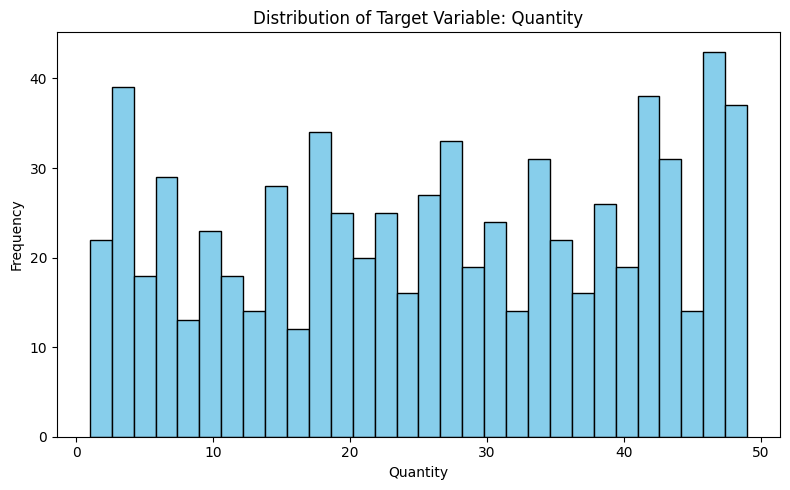

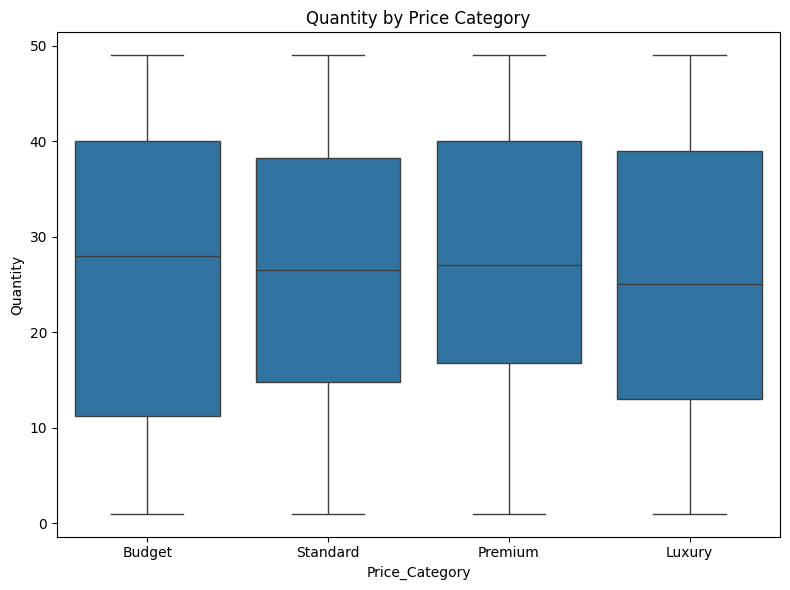

<ipython-input-4-ebf2dc9a5490>:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_model, x='Coffee_Bean_Type', y='Quantity', estimator=np.mean, ci=None, palette='viridis')
<ipython-input-4-ebf2dc9a5490>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_model, x='Coffee_Bean_Type', y='Quantity', estimator=np.mean, ci=None, palette='viridis')


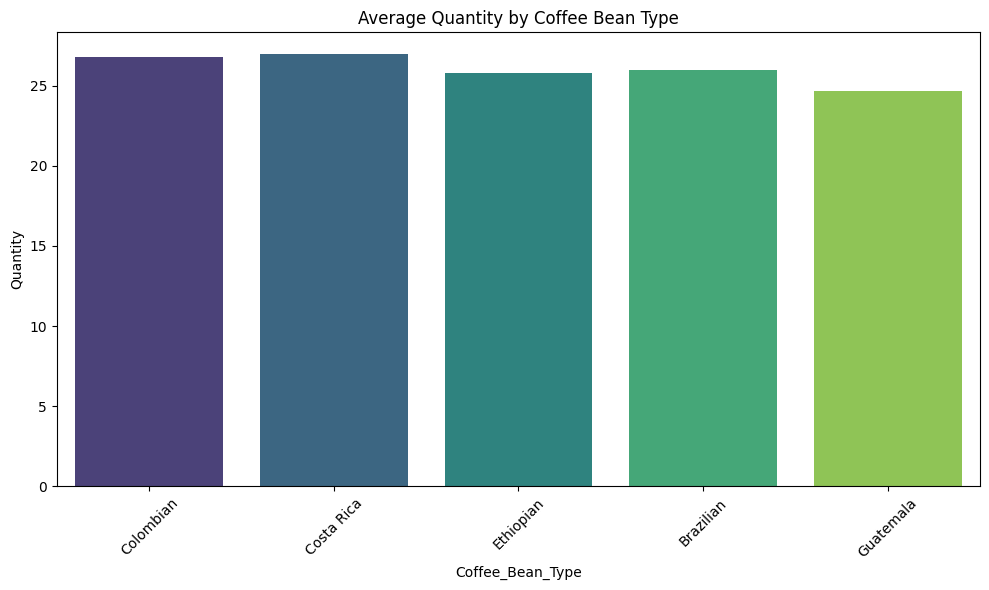

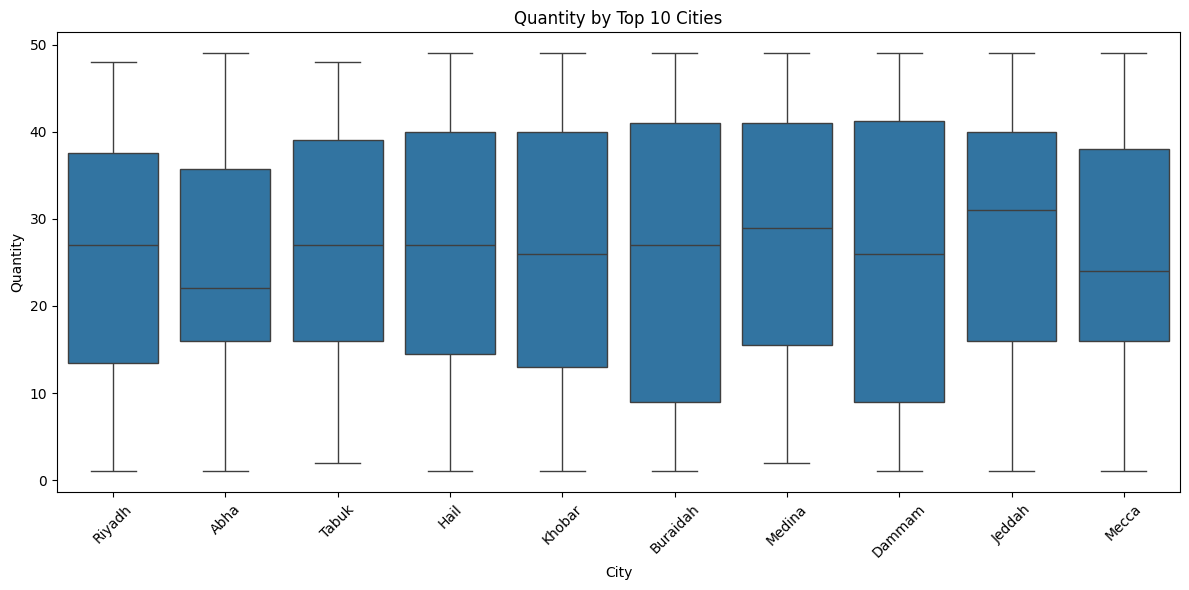

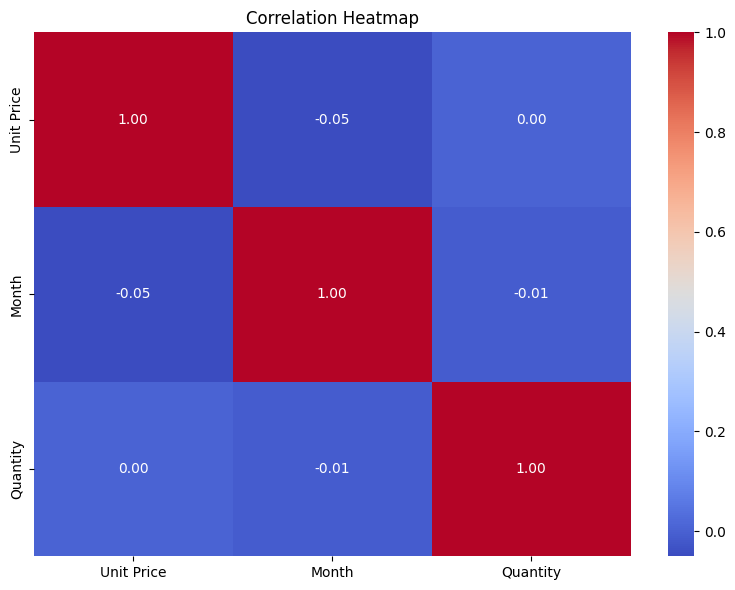

Predictive goal defined and supported with visual analysis. Ready for modeling.
Next steps: encode categorical variables, train-test split, model training, and evaluation.


In [4]:
# 05 - Predictive Goal Definition: Preparing for Machine Learning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Load dataset from common paths
paths = [
    "coffee_sales_prepared.csv",
    "data/coffee_sales_prepared.csv",
    "DatasetForCoffeeSales2.csv",
    "data/DatasetForCoffeeSales2.csv"
]

dataset_path = None
for path in paths:
    if os.path.exists(path):
        dataset_path = path
        break

if dataset_path is None:
    raise FileNotFoundError("Dataset not found.")

df = pd.read_csv(dataset_path)

# Add derived columns if not present
if 'Coffee_Bean_Type' not in df.columns and 'Product' in df.columns:
    df['Coffee_Bean_Type'] = df['Product']

if 'Bean_Category' not in df.columns:
    df['Bean_Category'] = df['Unit Price'].apply(lambda x: 'Premium' if x >= 40 else 'Standard')

if 'Price_Category' not in df.columns:
    df['Price_Category'] = df['Unit Price'].map({30: 'Budget', 35: 'Standard', 40: 'Premium', 45: 'Luxury'})

if 'Month' not in df.columns and 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Month'] = df['Date'].dt.month

print(f"Loaded dataset with {df.shape[0]} rows.")

# Define regression problem to predict 'Quantity'
features = [
    'Unit Price', 'Used_Discount', 'City', 'Coffee_Bean_Type',
    'Price_Category', 'Bean_Category', 'Month', 'Quantity'
]

df_model = df[features].dropna().copy()
print(df_model.head())

# 1. Distribution of target variable
plt.figure(figsize=(8, 5))
plt.hist(df_model['Quantity'], bins=30, edgecolor='black', color='skyblue')
plt.title("Distribution of Target Variable: Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Quantity by Price Category
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_model, x='Price_Category', y='Quantity', order=['Budget', 'Standard', 'Premium', 'Luxury'])
plt.title("Quantity by Price Category")
plt.tight_layout()
plt.show()

# 3. Average Quantity by Coffee Bean Type
plt.figure(figsize=(10, 6))
sns.barplot(data=df_model, x='Coffee_Bean_Type', y='Quantity', estimator=np.mean, ci=None, palette='viridis')
plt.title("Average Quantity by Coffee Bean Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Quantity by Top 10 Cities
top_cities = df_model['City'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_model[df_model['City'].isin(top_cities)], x='City', y='Quantity')
plt.title("Quantity by Top 10 Cities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Correlation heatmap
plt.figure(figsize=(8, 6))
numeric_data = df_model.select_dtypes(include='number')
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Summary
print("Predictive goal defined and supported with visual analysis. Ready for modeling.")
print("Next steps: encode categorical variables, train-test split, model training, and evaluation.")
